In [72]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import pandas as pd
import requests as req
from bs4 import BeautifulSoup as bs

In [2]:
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.by import By

In [3]:
opciones=Options()

opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)
opciones.headless=False    # si True, no aperece la ventana (headless=no visible)
opciones.add_argument('--start-maximized')         # comienza maximizado
#opciones.add_argument('user-data-dir=selenium')    # mantiene las cookies
#opciones.add_extension('driver_folder/adblock.crx')       # adblocker
opciones.add_argument('--incognito')

### Extracción sistema de puntuación

In [4]:
#cogeremos la tabla de esta url

url = 'https://www.dazn.com/es-ES/news/f%C3%B3rmula-1/como-se-reparten-los-puntos-en-f1/1lrfnerijevkf17w0meq0moi1k'

In [5]:
#scrapeamos con BeautifulSoup

html = req.get(url).text

sopa = bs(html, 'html.parser')

In [6]:
tabla1 = sopa.find('table')

tabla1

<table> <thead> <tr> <th>POSICIÓN</th> <th>PUNTOS</th> </tr> </thead> <tbody> <tr> <td>1º</td> <td>25</td> </tr> <tr> <td>2º</td> <td>18</td> </tr> <tr> <td>3º</td> <td>15</td> </tr> <tr> <td>4º</td> <td>12</td> </tr> <tr> <td>5º</td> <td>10</td> </tr> <tr> <td>6º</td> <td>8</td> </tr> <tr> <td>7º</td> <td>6</td> </tr> <tr> <td>8º</td> <td>4</td> </tr> <tr> <td>9º</td> <td>2</td> </tr> <tr> <td>10º</td> <td>1</td> </tr> </tbody></table>

In [7]:
tabla1.find_all('th')

[<th>POSICIÓN</th>, <th>PUNTOS</th>]

In [8]:
cabeceras=[]

for e in tabla1.find_all('th'):
    
    cabeceras.append(e.text.strip())

cabeceras   

['POSICIÓN', 'PUNTOS']

In [9]:
filas = tabla1.find_all('tr')[1:]

In [10]:
data1 = []

for f in filas:
    
    tmp1= []
    
    for e in f.find_all('td'):
        
        tmp1.append(e.text.strip())
        
    data1.append(tmp1)
        
data1[:5]

[['1º', '25'], ['2º', '18'], ['3º', '15'], ['4º', '12'], ['5º', '10']]

In [11]:
puntuacion = pd.DataFrame(data1, columns=cabeceras)

puntuacion.head()

,POSICIÓN,PUNTOS
0,1º,25
1,2º,18
2,3º,15
3,4º,12
4,5º,10


In [12]:
puntuacion.to_csv(r"C:\\Users\\chiin\\Desktop\\Proyecto_ETL\\data\\puntuacion.csv", index=False)

### Extracción de tabla de circuitos

In [13]:
url = 'https://en.wikipedia.org/wiki/2012_Formula_One_World_Championship'

In [14]:
html = req.get(url).text

sopa = bs(html, 'html.parser')

In [15]:
#encontramos la tabla de los circuitos de ese año

tabla2 = sopa.find_all('table')[2]

In [16]:
cabeceras2=[]

for e in tabla2.find_all('th')[1:4]:
    
    cabeceras2.append(e.text.strip())

cabeceras2

['Grand Prix', 'Circuit', 'Date']

In [17]:
filas2 = tabla2.find_all('tr')[1:-1]

In [18]:
data2 = []

for f in filas2:
    
    tmp2= []
    
    for e in f.find_all('td'):
        
        tmp2.append(e.text.strip())
        
    data2.append(tmp2)
        
data2[:5]

[['Australian Grand Prix', 'Albert Park Circuit, Melbourne', '18 March'],
 ['Malaysian Grand Prix',
  'Sepang International Circuit, Kuala Lumpur',
  '25 March'],
 ['Chinese Grand Prix',
  'Shanghai International Circuit, Shanghai',
  '15 April'],
 ['Bahrain Grand Prix', 'Bahrain International Circuit, Sakhir', '22 April'],
 ['Spanish Grand Prix', 'Circuit de Catalunya, Montmeló', '13 May']]

In [19]:
circuitos = pd.DataFrame(data2, columns=cabeceras2)

circuitos.head()

,Grand Prix,Circuit,Date
0,Australian Grand Prix,"Albert Park Circuit, Melbourne",18 March
1,Malaysian Grand Prix,"Sepang International Circuit, Kuala Lumpur",25 March
2,Chinese Grand Prix,"Shanghai International Circuit, Shanghai",15 April
3,Bahrain Grand Prix,"Bahrain International Circuit, Sakhir",22 April
4,Spanish Grand Prix,"Circuit de Catalunya, Montmeló",13 May


In [20]:
circuitos.insert(0, "Round", range(1, len(circuitos) + 1))

circuitos.tail()

,Round,Grand Prix,Circuit,Date
15,16,Korean Grand Prix,"Korea International Circuit, Yeongam",14 October
16,17,Indian Grand Prix,"Buddh International Circuit, Greater Noida",28 October
17,18,Abu Dhabi Grand Prix,"Yas Marina Circuit, Abu Dhabi",4 November
18,19,United States Grand Prix,"Circuit of the Americas, Austin, Texas",18 November
19,20,Brazilian Grand Prix,"Autódromo José Carlos Pace, São Paulo",25 November


In [21]:
circuitos.to_csv(r"C:\\Users\\chiin\\Desktop\\Proyecto_ETL\\data\\circuitos.csv", index=False)

### Driver Standings

In [22]:
# vamos a coger los datos de esta url

url = 'https://soymotor.com/clasificacion-mundial-f1/2012'

In [23]:
PATH = ChromeDriverManager().install()

In [24]:
driver = webdriver.Chrome(PATH,options = opciones)

C:\Users\chiin\AppData\Local\Temp\ipykernel_6020\1426036497.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH,options = opciones)


In [25]:
driver.get(url)

In [26]:
tabla = driver.find_element(By.TAG_NAME,'table')

encabezados = [th.text for th in tabla.find_elements(By.TAG_NAME,'th')]

filas = []

for fila in tabla.find_elements(By.TAG_NAME,'tr'):
    
    datos_fila = [td.text for td in fila.find_elements(By.TAG_NAME,'td')]
    
    filas.append(datos_fila)

driver.quit()

In [27]:
clasificacion_pilotos = pd.DataFrame(filas, columns=encabezados)

clasificacion_pilotos.head()

,P,Piloto,Pts,,,,,,,,...,,,,,,,,,,
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1,S. Vettel,281,18,11º,10,25,8,12,12,...,12,18,22º,25,25,25,25,15,18,8
2,2,F. Alonso,278,10,25,2,6,18,15,10,...,10,RET,15,15,RET,15,18,18,15,18
3,3,K. Räikkönen,207,6,10,14º,18,15,2,4,...,18,15,10,8,8,10,6,25,8,1
4,4,L. Hamilton,190,15,15,15,4,4,10,25,...,25,RET,25,RET,10,1,12,RET,25,RET


In [28]:
#eliminamos la primera fila del dataframe 

clasificacion_pilotos.drop(clasificacion_pilotos.index[0], inplace = True)

clasificacion_pilotos.head()

,P,Piloto,Pts,,,,,,,,...,,,,,,,,,,
1,1,S. Vettel,281,18,11º,10,25,8,12,12,...,12,18,22º,25,25,25,25,15,18,8
2,2,F. Alonso,278,10,25,2,6,18,15,10,...,10,RET,15,15,RET,15,18,18,15,18
3,3,K. Räikkönen,207,6,10,14º,18,15,2,4,...,18,15,10,8,8,10,6,25,8,1
4,4,L. Hamilton,190,15,15,15,4,4,10,25,...,25,RET,25,RET,10,1,12,RET,25,RET
5,5,J. Button,188,25,14º,18,18º,2,16º,16º,...,8,25,RET,18,12,RET,10,12,10,25


In [29]:
# vamos a renombrar las columnas

clasificacion_pilotos.columns

Index(['P', 'Piloto', 'Pts', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', ''],
      dtype='object')

In [30]:
clasificacion_pilotos.columns = ['Posicion','Piloto', 'Puntos_totales','Australian GP','Malaysian GP','Chinese GP','Bahrein GP','Spanish GP','Monaco GP','Canadian GP','European GP','British GP','German GP','Hungarian GP', 'Belgian GP', 'Italian GP','Singapore GP','Japanese GP', 'Korean GP','Indian GP','Abu Dhabi GP','USA GP','Brazilian GP']

clasificacion_pilotos.head()

,Posicion,Piloto,Puntos_totales,Australian GP,Malaysian GP,Chinese GP,Bahrein GP,Spanish GP,Monaco GP,Canadian GP,...,Hungarian GP,Belgian GP,Italian GP,Singapore GP,Japanese GP,Korean GP,Indian GP,Abu Dhabi GP,USA GP,Brazilian GP
1,1,S. Vettel,281,18,11º,10,25,8,12,12,...,12,18,22º,25,25,25,25,15,18,8
2,2,F. Alonso,278,10,25,2,6,18,15,10,...,10,RET,15,15,RET,15,18,18,15,18
3,3,K. Räikkönen,207,6,10,14º,18,15,2,4,...,18,15,10,8,8,10,6,25,8,1
4,4,L. Hamilton,190,15,15,15,4,4,10,25,...,25,RET,25,RET,10,1,12,RET,25,RET
5,5,J. Button,188,25,14º,18,18º,2,16º,16º,...,8,25,RET,18,12,RET,10,12,10,25


In [31]:
clasificacion_pilotos = clasificacion_pilotos.replace(r'\d+º', '0', regex = True)

clasificacion_pilotos = clasificacion_pilotos.replace('RET', '0', regex = True)

clasificacion_pilotos.head()

,Posicion,Piloto,Puntos_totales,Australian GP,Malaysian GP,Chinese GP,Bahrein GP,Spanish GP,Monaco GP,Canadian GP,...,Hungarian GP,Belgian GP,Italian GP,Singapore GP,Japanese GP,Korean GP,Indian GP,Abu Dhabi GP,USA GP,Brazilian GP
1,1,S. Vettel,281,18,0,10,25,8,12,12,...,12,18,0,25,25,25,25,15,18,8
2,2,F. Alonso,278,10,25,2,6,18,15,10,...,10,0,15,15,0,15,18,18,15,18
3,3,K. Räikkönen,207,6,10,0,18,15,2,4,...,18,15,10,8,8,10,6,25,8,1
4,4,L. Hamilton,190,15,15,15,4,4,10,25,...,25,0,25,0,10,1,12,0,25,0
5,5,J. Button,188,25,0,18,0,2,0,0,...,8,25,0,18,12,0,10,12,10,25


In [32]:
clasificacion_pilotos.isnull().sum()

#no hay nulos

Posicion          0
Piloto            0
Puntos_totales    0
Australian GP     0
Malaysian GP      0
Chinese GP        0
Bahrein GP        0
Spanish GP        0
Monaco GP         0
Canadian GP       0
European GP       0
British GP        0
German GP         0
Hungarian GP      0
Belgian GP        0
Italian GP        0
Singapore GP      0
Japanese GP       0
Korean GP         0
Indian GP         0
Abu Dhabi GP      0
USA GP            0
Brazilian GP      0
dtype: int64

In [33]:
clasificacion_pilotos.columns

Index(['Posicion', 'Piloto', 'Puntos_totales', 'Australian GP', 'Malaysian GP',
       'Chinese GP', 'Bahrein GP', 'Spanish GP', 'Monaco GP', 'Canadian GP',
       'European GP', 'British GP', 'German GP', 'Hungarian GP', 'Belgian GP',
       'Italian GP', 'Singapore GP', 'Japanese GP', 'Korean GP', 'Indian GP',
       'Abu Dhabi GP', 'USA GP', 'Brazilian GP'],
      dtype='object')

In [34]:
clasificacion_pilotos.to_csv(r"C:\\Users\\chiin\\Desktop\\Proyecto_ETL\\data\\clasificacion_pilotos.csv",index=False)

### LIMPIEZA CSV PILOTOS

En el csv descargado, aparecen los pilotos de toda la historia de la fórmula 1, pero en este caso solo queremos los que participaron en la temporada 2012, por lo tantos vamos a limpiar la tabla de los pilotos para que solo tengamos los que necesitamos

In [35]:
pilotos = pd.read_csv("C:\\Users\\chiin\\Desktop\\Proyecto_ETL\\data\\drivers.csv")

pilotos.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


Vamos a borrar todas las columnas que no necesitemos para nuestro dataframe, en este caso para empezar podemos borrar la columna url, la columna de la fecha de nacimiento que es la columna dob, y la columna de numero. Porque el numero no empezó a ser identificativo hasta la temporada 2014, que podias escoger el número que querias, pero en la temporada que vamos a analizar (2012), los numeros de cada piloto era el puesto en el que habian quedado en el año anterior. 

In [36]:
#vamos a borrar la columna url

pilotos.drop("url", axis =1, inplace = True)

pilotos.drop("dob", axis =1, inplace = True)

pilotos.drop("number", axis =1, inplace = True)

In [37]:
pilotos.head()

,driverId,driverRef,code,forename,surname,nationality
0,1,hamilton,HAM,Lewis,Hamilton,British
1,2,heidfeld,HEI,Nick,Heidfeld,German
2,3,rosberg,ROS,Nico,Rosberg,German
3,4,alonso,ALO,Fernando,Alonso,Spanish
4,5,kovalainen,KOV,Heikki,Kovalainen,Finnish


In [38]:
pilotos['forename'] = pilotos['forename'] + ' ' + pilotos['surname']

pilotos.head()

,driverId,driverRef,code,forename,surname,nationality
0,1,hamilton,HAM,Lewis Hamilton,Hamilton,British
1,2,heidfeld,HEI,Nick Heidfeld,Heidfeld,German
2,3,rosberg,ROS,Nico Rosberg,Rosberg,German
3,4,alonso,ALO,Fernando Alonso,Alonso,Spanish
4,5,kovalainen,KOV,Heikki Kovalainen,Kovalainen,Finnish


In [39]:
pilotos.drop("surname", axis =1, inplace = True)

pilotos.drop("driverRef", axis =1, inplace = True)

pilotos = pilotos.rename(columns={'forename': 'name'})

pilotos.head()

,driverId,code,name,nationality
0,1,HAM,Lewis Hamilton,British
1,2,HEI,Nick Heidfeld,German
2,3,ROS,Nico Rosberg,German
3,4,ALO,Fernando Alonso,Spanish
4,5,KOV,Heikki Kovalainen,Finnish


In [40]:
pilotos.shape

(857, 4)

In [41]:
# vamos a crear un dataframe nuevo, cogiendo solo los pilotos que participaron en 2012

columnas = ["driverId", "code", "name", "nationality"]

pilotos_2012 = pd.DataFrame(columns=columnas)

pilotos_2012

,driverId,code,name,nationality


In [42]:
# ahora de todo el dataframe de pilotos vamos a seleccionar solo los pilotos que participaron en 2012

pilotos_f12012 = [
    "Sebastian Vettel",
    "Mark Webber",
    "Jenson Button",
    "Lewis Hamilton",
    "Fernando Alonso",
    "Felipe Massa",
    "Michael Schumacher",
    "Nico Rosberg",
    "Kimi Räikkönen",
    "Romain Grosjean",
    "Jérôme d'Ambrosio",
    "Paul di Resta",
    "Nico Hülkenberg",
    "Kamui Kobayashi",
    "Sergio Pérez",
    "Daniel Ricciardo",
    "Jean-Éric Vergne",
    "Pastor Maldonado",
    "Bruno Senna",
    "Heikki Kovalainen",
    "Vitaly Petrov",
    "Pedro de la Rosa",
    "Narain Karthikeyan",
    "Timo Glock",
    "Charles Pic"
]

pilotos_2012 = pilotos.loc[pilotos["name"].isin(pilotos_f12012)]

pilotos_2012.reset_index(drop=True, inplace = True)

pilotos_2012.head()

,driverId,code,name,nationality
0,1,HAM,Lewis Hamilton,British
1,3,ROS,Nico Rosberg,German
2,4,ALO,Fernando Alonso,Spanish
3,5,KOV,Heikki Kovalainen,Finnish
4,8,RAI,Kimi Räikkönen,Finnish


In [43]:
pilotos_2012.to_csv(r"C:\\Users\\chiin\\Desktop\\Proyecto_ETL\\data\\pilotos_2012.csv", index=False)

### Tabla Contructores(escuderías)

In [44]:
url = "https://www.formula1.com/en/results.html/2012/team.html"

response = req.get(url)

html_content = response.text

soup = bs(html_content, "html.parser")

tabla = soup.find("table", {"class": "resultsarchive-table"})

encabezados = [th.text for th in tabla.thead.find_all("th")]

filas = []

for fila in tabla.tbody.find_all("tr"):
    
    detalles_fila = [td.text.strip() for td in fila.find_all("td")]
    
    filas.append(detalles_fila)

escuderias = pd.DataFrame(filas, columns=encabezados)

In [45]:
escuderias['escuderia_id'] = range(1, len(escuderias) + 1)

In [46]:
escuderias

,,Pos,Team,PTS,,escuderia_id
0,,1,Red Bull Racing Renault,460,,1
1,,2,Ferrari,400,,2
2,,3,McLaren Mercedes,378,,3
3,,4,Lotus Renault,303,,4
4,,5,Mercedes,142,,5
5,,6,Sauber Ferrari,126,,6
6,,7,Force India Mercedes,109,,7
7,,8,Williams Renault,76,,8
8,,9,STR Ferrari,26,,9
9,,10,Caterham Renault,0,,10


In [47]:
escuderias.to_csv(r"C:\\Users\\chiin\\Desktop\\Proyecto_ETL\\data\\escuderias.csv", index=False)

### BONUS

Vamos a realizar un estudio de algunas cosas. La temporada 2012 de F1 esta considerada como una de las mejores, por la pelea por el título y por varios factors mas que vamos a demostrar a continuación.

In [51]:
# del dataframe de clasificacion por pilotos vamos a coger las 6 primeras carreras del año

clasificacion_pilotos.iloc[:, 1:9].head(15)

,Piloto,Puntos_totales,Australian GP,Malaysian GP,Chinese GP,Bahrein GP,Spanish GP,Monaco GP
1,S. Vettel,281,18,0,10,25,8,12
2,F. Alonso,278,10,25,2,6,18,15
3,K. Räikkönen,207,6,10,0,18,15,2
4,L. Hamilton,190,15,15,15,4,4,10
5,J. Button,188,25,0,18,0,2,0
6,M. Webber,179,12,12,12,12,0,25
7,F. Massa,122,0,0,0,2,0,8
8,R. Grosjean,96,0,0,8,15,12,0
9,N. Rosberg,93,0,0,25,10,6,18
10,S. Pérez,66,4,18,0,0,0,0


Viendo la tabla de arriba, podemos observar que en las 6 primeras carreras, hubo 6 ganadores diferentes, cosa que ocurre muy poco con este deporte

#### Comparación top4 escuderías

Sabemos que los pilotos ferrari de 2012 eran Fernando Alonso y Felipe Massa. Veamos sus datos

In [57]:
puntos_alonso = 278

puntos_massa = 122

puntos_ferrari = puntos_alonso + puntos_massa

puntos_ferrari

400

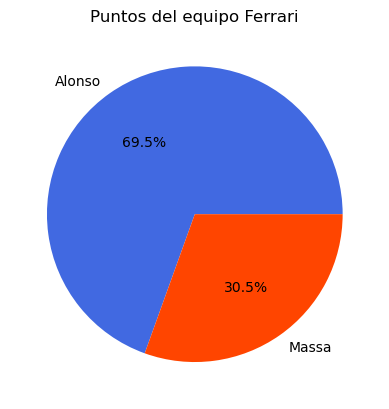

In [58]:
etiquetas = ['Alonso', 'Massa']

valores = [puntos_alonso, puntos_massa]

colores = ['royalblue', 'orangered']

plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%')

plt.title('Puntos del equipo Ferrari')

plt.show()

Vamos ahora con RedBull, donde sus pilotos eran Sebastian Vettel y Mark Webber.

In [61]:
puntos_vettel = 281

puntos_webber = 179

puntos_redbull = puntos_vettel + puntos_webber

puntos_redbull

460

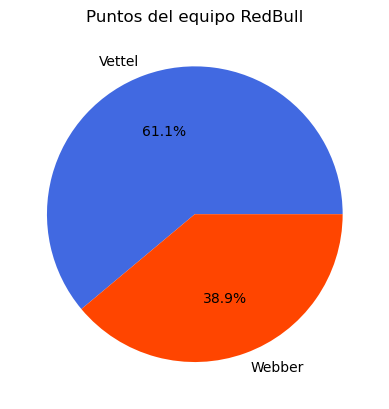

In [62]:
etiquetas = ['Vettel', 'Webber']

valores = [puntos_vettel, puntos_webber]

colores = ['royalblue', 'orangered']

plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%')

plt.title('Puntos del equipo RedBull')

plt.show()

Vamos ahora con  McLaren Mercedes, con sus pilotos Lewis Hamilton y Jenson Button

In [63]:
puntos_hamilton = 190

puntos_button = 188

puntos_mclaren = puntos_hamilton + puntos_button

puntos_mclaren

378

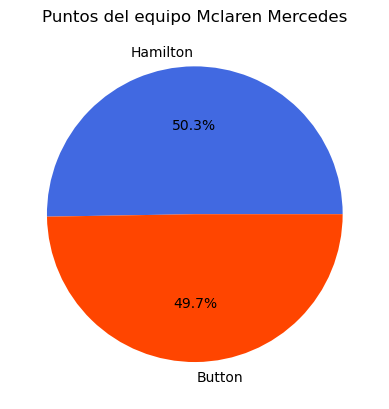

In [64]:
etiquetas = ['Hamilton', 'Button']

valores = [puntos_hamilton, puntos_button]

colores = ['royalblue', 'orangered']

plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%')

plt.title('Puntos del equipo Mclaren Mercedes')

plt.show()

Vamos con Lotus Renault, que contaba con Kimi Räikkönen, Romain Grosjean y Jérôme d'Ambrosio(sustituyó a Romain Grosjean en una carrera, consiguiendo 0 puntos, asi que no lo tendremos en cuenta prara este estudio)

In [65]:
puntos_kimi = 207

puntos_grosjean = 96

puntos_lotus = puntos_kimi + puntos_grosjean

puntos_lotus

303

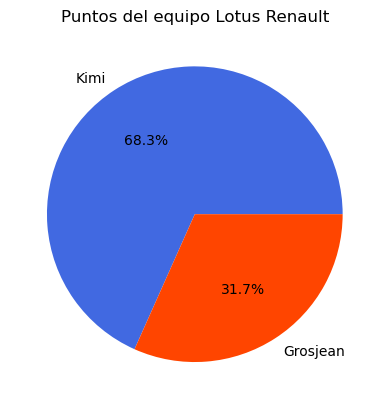

In [66]:
etiquetas = ['Kimi', 'Grosjean']

valores = [puntos_kimi, puntos_grosjean]

colores = ['royalblue', 'orangered']

plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%')

plt.title('Puntos del equipo Lotus Renault')

plt.show()

En el caso de Ferrari y Lotus, podemos claramente como uno de los dos pilotos consigue mas del 65% de los puntos totales del equipo, mientras que en RedBull vemos que Vettel consigue más pero no se caerca a los otros dos ejemplos, mientras que en Mclaren Mercedes vemos una igualdad poco comun en la f1.

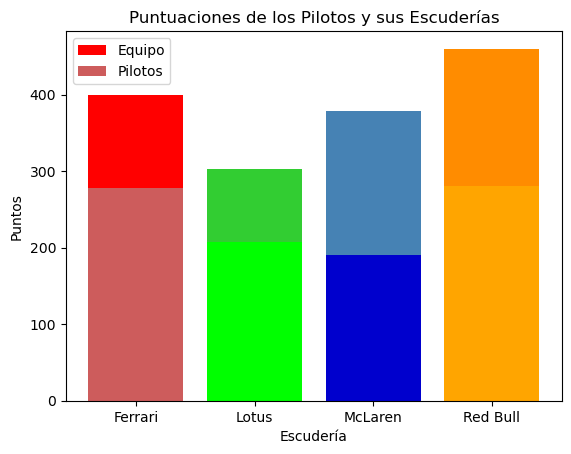

In [69]:
etiquetas = ['Ferrari', 'Lotus', 'McLaren', 'Red Bull']
puntos_equipo = [puntos_ferrari, puntos_lotus, puntos_mclaren, puntos_redbull]
puntos_pilotos = [puntos_alonso, puntos_kimi, puntos_hamilton, puntos_vettel]

colores_equipo = ['red', 'limegreen', 'steelblue', 'darkorange']
colores_pilotos = ['indianred', 'lime', 'mediumblue', 'orange']

plt.bar(etiquetas, puntos_equipo, color=colores_equipo, label='Equipo')
plt.bar(etiquetas, puntos_pilotos, color=colores_pilotos, label='Pilotos')

plt.xlabel('Escudería')
plt.ylabel('Puntos')
plt.title('Puntuaciones de los Pilotos y sus Escuderías')
plt.legend()


plt.show()